<a href="https://colab.research.google.com/github/snares27/Calculator/blob/main/%5BS25_ML%5D_K_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS 5361/6361 Machine Learning - The k-nearest neighbor algorithm**

**Author:** Olac Fuentes<br>
Computer Science Department<br>
University of Texas at El Paso<br>
**Last modified:** 2/6/2025<br>

Basic k-nearest neighbor algorithm:
1.   Store training data, assume each instance is a point in space with coordinates given by its attribute values
2.   For each test example:
*   find the k most similar training examples, in terms of Euclidean distance
*   predict that the training example belongs to the most common class among its k neighbors (for classification)
*   predict that the training example has a y value equal to the average y value of its k neighbors (for regression)

Thus we can view the k-nearest neighbor prediction for an instance x as a vote among its k nearest neighbors.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score, confusion_matrix


X, y = make_blobs(n_samples = [50,50,50,50], centers = [[35,30],[40,60],[70,40],[65,80]],cluster_std = [10,10,10,10], random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

Weighted k-nearest neighbor algorithm:
1.   Store training data, assume each instance is a point in space with coordinates given by its attribute values
2.   For each test example:
*   find the k most similar training examples, in terms of Euclidean distance
*   predict that the training example belongs to the most common class among its k neighbors (for classification)
*   predict that the training example has a y value equal to the average y value of its k neighbors (for classification)

Now we will classify the test set using the sklearn implementation of k-nearest neighbors with default parameters.

The documentation can be found here:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

1-nearest neighbor

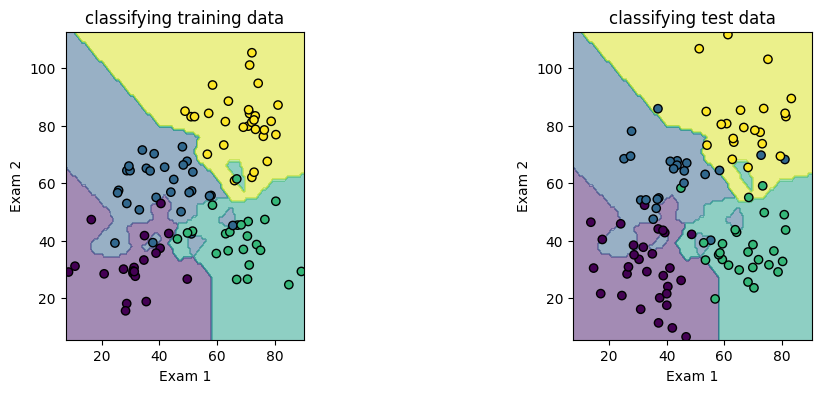

Prediction accuracy on training set: 1.0000
Prediction accuracy on test set:     0.8400
Confusion matrix:
[[24  5  1  0]
 [ 0 18  0  4]
 [ 1  2 22  2]
 [ 0  0  1 20]]


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

fig, ax = plt.subplots(1,2,figsize=(12, 4))

disp = DecisionBoundaryDisplay.from_estimator(classifier, X, response_method="predict",
      xlabel="Exam 1", ylabel="Exam 2",ax=ax[0],alpha=0.5)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k")
ax[0].set_title('classifying training data')
ax[0].set_aspect('equal')

disp = DecisionBoundaryDisplay.from_estimator(      classifier, X, response_method="predict",
      xlabel="Exam 1", ylabel="Exam 2",ax=ax[1],alpha=0.5)
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")
ax[1].set_title('classifying test data')
ax[1].set_aspect('equal')
plt.show()

pred = classifier.predict(X_train)
print(f'Prediction accuracy on training set: {accuracy_score(y_train,pred):6.4f}')
pred = classifier.predict(X_test)
print(f'Prediction accuracy on test set:     {accuracy_score(y_test,pred):6.4f}')
print(f'Confusion matrix:\n{confusion_matrix(y_test,pred)}')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
classifier = KNeighborsRegressor(n_neighbors=3)
classifier.fit(X_train, y_train)


pred = classifier.predict(X_train)
pred = np.int16(pred+0.5)
print(f'Prediction accuracy on training set: {accuracy_score(y_train,pred):6.4f}')
pred = classifier.predict(X_test)
pred = np.int16(pred+0.5)
print(f'Prediction accuracy on test set:     {accuracy_score(y_test,pred):6.4f}')
print(f'Confusion matrix:\n{confusion_matrix(y_test,pred)}')

Prediction accuracy on training set: 0.8800
Prediction accuracy on test set:     0.8500
Confusion matrix:
[[27  2  1  0]
 [ 1 16  3  2]
 [ 0  3 22  2]
 [ 0  0  1 20]]


In [ ]:
np.int16(pred+.5)

array([3, 0, 1, 3, 0, 3, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 0, 3, 3, 0, 2, 0,
       1, 0, 0, 2, 1, 1, 3, 3, 1, 0, 2, 2, 1, 3, 2, 3, 0, 3, 1, 3, 2, 3,
       1, 3, 3, 1, 3, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3, 3, 1, 3, 0, 3, 2,
       1, 0, 1, 1, 3, 3, 2, 2, 1, 3, 1, 2, 1, 2, 2, 2, 3, 3, 0, 2, 3, 1,
       0, 2, 1, 0, 2, 0, 3, 3, 0, 1, 2, 2], dtype=int16)

In [ ]:
np.int16(pred)

array([2.66666667, 0.33333333, 1.        , 3.        , 0.        ,
       3.        , 0.66666667, 1.        , 0.        , 0.        ,
       1.        , 2.        , 1.        , 1.        , 2.        ,
       1.33333333, 0.        , 3.        , 3.        , 0.        ,
       1.66666667, 0.        , 0.66666667, 0.        , 0.        ,
       2.        , 0.66666667, 1.        , 3.        , 3.        ,
       0.66666667, 0.33333333, 2.        , 2.        , 1.        ,
       3.        , 1.66666667, 3.        , 0.        , 3.        ,
       1.33333333, 3.        , 2.33333333, 3.        , 1.        ,
       3.        , 3.        , 1.        , 3.        , 3.        ,
       1.        , 1.        , 2.        , 3.        , 1.        ,
       1.66666667, 1.66666667, 1.        , 1.        , 3.        ,
       3.        , 1.33333333, 2.66666667, 0.        , 2.66666667,
       1.66666667, 1.        , 0.33333333, 1.        , 0.66666667,
       3.        , 3.        , 1.66666667, 2.        , 0.66666

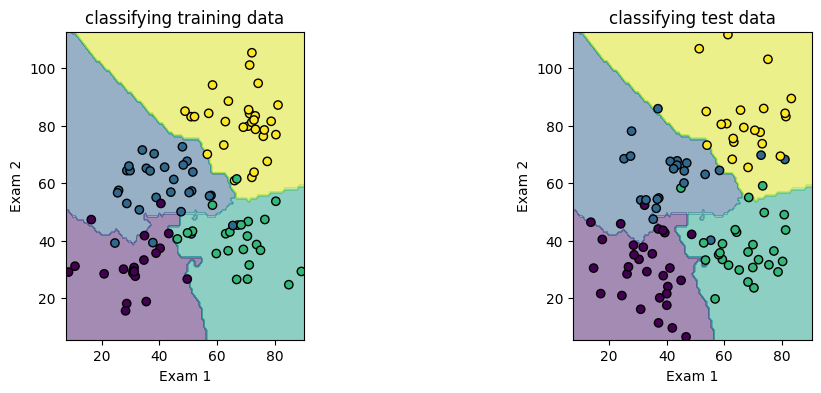

Prediction accuracy on training set: 0.9200
Prediction accuracy on test set:     0.8600
Confusion matrix:
[[27  2  1  0]
 [ 1 16  1  4]
 [ 1  1 23  2]
 [ 0  1  0 20]]


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

fig, ax = plt.subplots(1,2,figsize=(12, 4))

disp = DecisionBoundaryDisplay.from_estimator(classifier, X, response_method="predict",
      xlabel="Exam 1", ylabel="Exam 2",ax=ax[0],alpha=0.5)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k")
ax[0].set_title('classifying training data')
ax[0].set_aspect('equal')

disp = DecisionBoundaryDisplay.from_estimator(      classifier, X, response_method="predict",
      xlabel="Exam 1", ylabel="Exam 2",ax=ax[1],alpha=0.5)
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")
ax[1].set_title('classifying test data')
ax[1].set_aspect('equal')
plt.show()

pred = classifier.predict(X_train)
print(f'Prediction accuracy on training set: {accuracy_score(y_train,pred):6.4f}')
pred = classifier.predict(X_test)
print(f'Prediction accuracy on test set:     {accuracy_score(y_test,pred):6.4f}')
print(f'Confusion matrix:\n{confusion_matrix(y_test,pred)}')

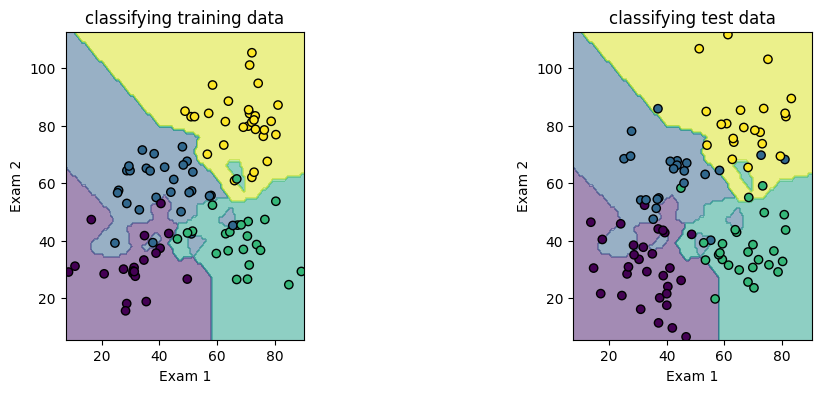

Prediction accuracy on training set: 1.0000
Prediction accuracy on test set:     0.8400
Confusion matrix:
[[24  5  1  0]
 [ 0 18  0  4]
 [ 1  2 22  2]
 [ 0  0  1 20]]


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=2,weights='distance')
classifier.fit(X_train, y_train)

fig, ax = plt.subplots(1,2,figsize=(12, 4))

disp = DecisionBoundaryDisplay.from_estimator(classifier, X, response_method="predict",
      xlabel="Exam 1", ylabel="Exam 2",ax=ax[0],alpha=0.5)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k")
ax[0].set_title('classifying training data')
ax[0].set_aspect('equal')

disp = DecisionBoundaryDisplay.from_estimator(      classifier, X, response_method="predict",
      xlabel="Exam 1", ylabel="Exam 2",ax=ax[1],alpha=0.5)
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")
ax[1].set_title('classifying test data')
ax[1].set_aspect('equal')
plt.show()

pred = classifier.predict(X_train)
print(f'Prediction accuracy on training set: {accuracy_score(y_train,pred):6.4f}')
pred = classifier.predict(X_test)
print(f'Prediction accuracy on test set:     {accuracy_score(y_test,pred):6.4f}')
print(f'Confusion matrix:\n{confusion_matrix(y_test,pred)}')

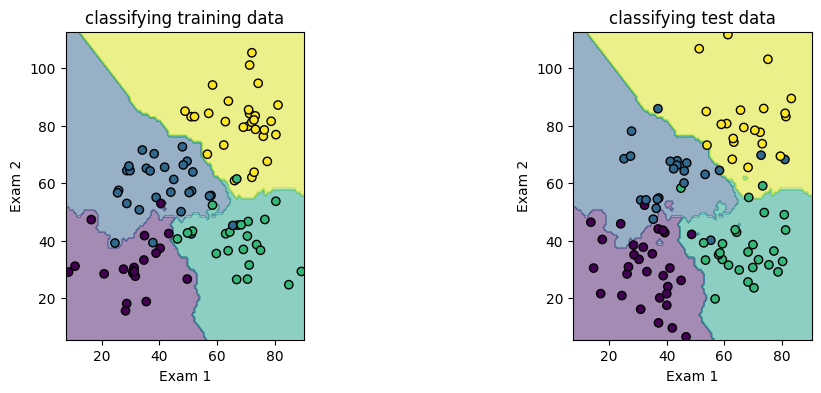

Prediction accuracy on training set: 1.0000
Prediction accuracy on test set:     0.9000
Confusion matrix:
[[27  2  1  0]
 [ 0 18  1  3]
 [ 0  1 25  1]
 [ 0  1  0 20]]


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5,weights='distance')
classifier.fit(X_train, y_train)

fig, ax = plt.subplots(1,2,figsize=(12, 4))

disp = DecisionBoundaryDisplay.from_estimator(classifier, X, response_method="predict",
      xlabel="Exam 1", ylabel="Exam 2",ax=ax[0],alpha=0.5)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k")
ax[0].set_title('classifying training data')
ax[0].set_aspect('equal')

disp = DecisionBoundaryDisplay.from_estimator(      classifier, X, response_method="predict",
      xlabel="Exam 1", ylabel="Exam 2",ax=ax[1],alpha=0.5)
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")
ax[1].set_title('classifying test data')
ax[1].set_aspect('equal')
plt.show()

pred = classifier.predict(X_train)
print(f'Prediction accuracy on training set: {accuracy_score(y_train,pred):6.4f}')
pred = classifier.predict(X_test)
print(f'Prediction accuracy on test set:     {accuracy_score(y_test,pred):6.4f}')
print(f'Confusion matrix:\n{confusion_matrix(y_test,pred)}')

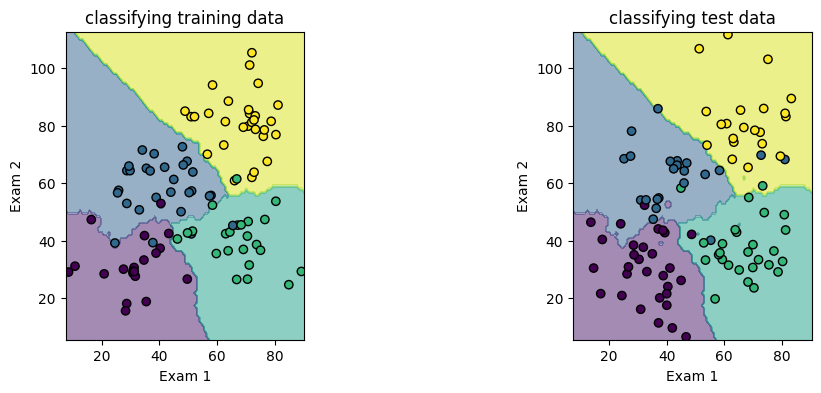

Prediction accuracy on training set: 1.0000
Prediction accuracy on test set:     0.9100
Confusion matrix:
[[27  2  1  0]
 [ 0 18  1  3]
 [ 0  1 25  1]
 [ 0  0  0 21]]


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=8,weights='distance')
classifier.fit(X_train, y_train)

fig, ax = plt.subplots(1,2,figsize=(12, 4))

disp = DecisionBoundaryDisplay.from_estimator(classifier, X, response_method="predict",
      xlabel="Exam 1", ylabel="Exam 2",ax=ax[0],alpha=0.5)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k")
ax[0].set_title('classifying training data')
ax[0].set_aspect('equal')

disp = DecisionBoundaryDisplay.from_estimator(      classifier, X, response_method="predict",
      xlabel="Exam 1", ylabel="Exam 2",ax=ax[1],alpha=0.5)
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")
ax[1].set_title('classifying test data')
ax[1].set_aspect('equal')
plt.show()

pred = classifier.predict(X_train)
print(f'Prediction accuracy on training set: {accuracy_score(y_train,pred):6.4f}')
pred = classifier.predict(X_test)
print(f'Prediction accuracy on test set:     {accuracy_score(y_test,pred):6.4f}')
print(f'Confusion matrix:\n{confusion_matrix(y_test,pred)}')

## **Exercise**

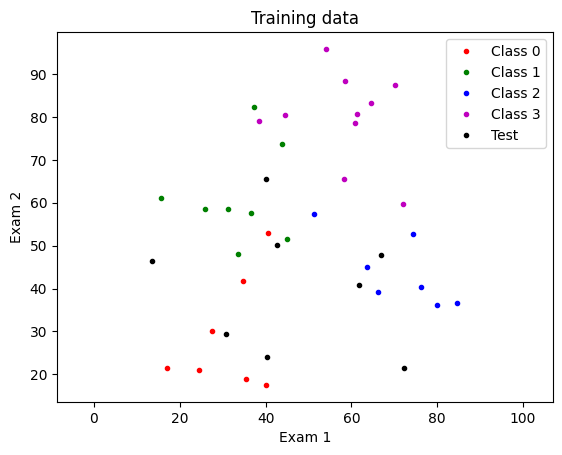

In [ ]:
X, y = make_blobs(n_samples = [10,10,10,10], centers = [[35,30],[40,60],[70,40],[65,80]],cluster_std = [10,10,10,10], random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

colors = 'rgbm'
classes = sorted(set(y))
plt.figure()
for c in classes:
  ind = (y_train==c)
  plt.plot(X_train[ind,0],X_train[ind,1],'.'+colors[c],label = 'Class '+str(c))
plt.plot(X_test[:,0],X_test[:,1],'.k',label = 'Test')
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.legend()
plt.title('Training data')
plt.axis('equal')
plt.show()

What class would 1-nearest neighbor predict for each of the instances in the test set?

In [ ]:
print(X_test)

[[40.00009761 65.42352572]
 [13.63803904 46.40270808]
 [72.16116006 21.41387614]
 [61.70864711 40.87710218]
 [30.83242153 29.43733173]
 [66.86491803 47.71011738]
 [42.56570452 50.11220951]
 [40.39058321 24.038403  ]]


In [ ]:
y_test

array([1, 0, 2, 2, 0, 2, 1, 0])

What is the accuracy of the predictions?

Write code to verify that your predictions are correct.

# **A regression example**

We will use k-nearest neighbors to predict house prices using the California housing dataset - which is a continuous (floating point) variable.

In [ ]:
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
x = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5361)

print(dataset.feature_names)

print('Array shapes')
for x in [X_train, X_test, y_train, y_test]:
  print(x.shape)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Array shapes
(16512, 8)
(4128, 8)
(16512,)
(4128,)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = KNeighborsRegressor(n_neighbors=3, weights='distance')
model.fit(X_train, y_train)
start = time.time()
pred = model.predict(X_test)
elapsed_time = time.time()-start
print('\nElapsed_time testing  {0:.6f} '.format(elapsed_time))
print(f'mean_absolute_error: {mean_absolute_error(y_test,pred):6.4f}')
print(f'mean_squared_error: {mean_squared_error(y_test,pred):6.4f}')


Elapsed_time testing  0.057673 
mean_absolute_error: 0.8188
mean_squared_error: 1.1702


A common way to visualize the quality of predictions is to use a scatter plot.

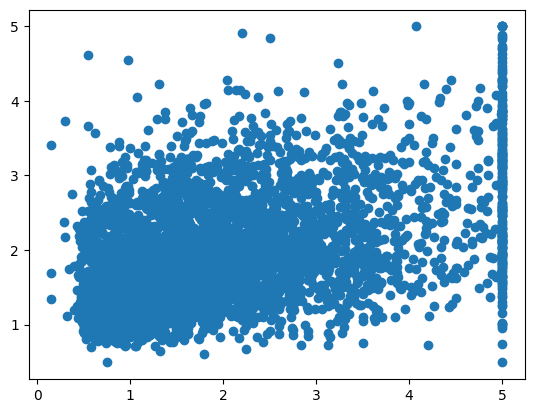

In [ ]:
plt.scatter(y_test,pred)

We will add labels for the axes and make the markers smaller and semi-transparent.

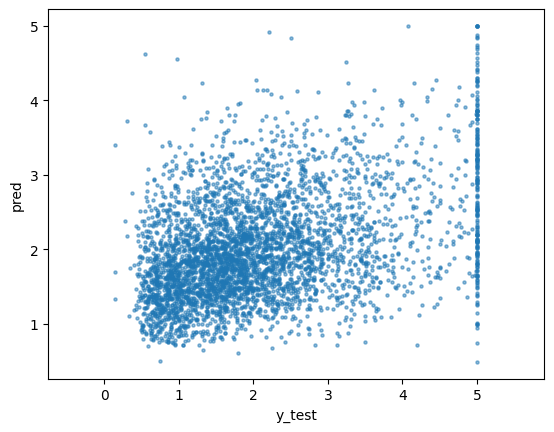

In [ ]:
plt.scatter(y_test,pred,s=5,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("pred")
plt.axis('equal')
plt.show()

How will the algorithm perform on the training set?

mean_absolute_error: 0.0000
mean_squared_error: 0.0000


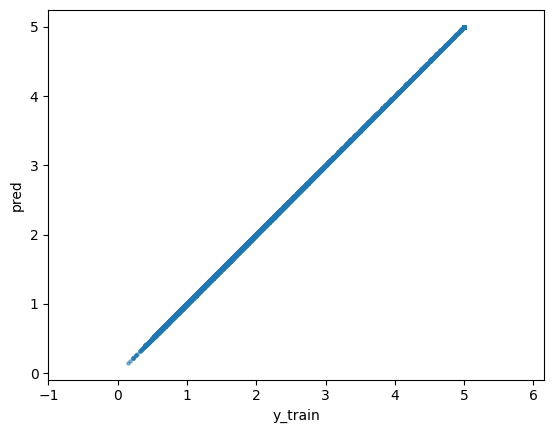

In [ ]:
pred = model.predict(X_train)
print(f'mean_absolute_error: {mean_absolute_error(y_train,pred):6.4f}')
print(f'mean_squared_error: {mean_squared_error(y_train,pred):6.4f}')
plt.scatter(y_train,pred,s=5,alpha=0.5)
plt.xlabel("y_train")
plt.ylabel("pred")
plt.axis('equal')
plt.show()

Now let's evaluate the performance of the algorithm for different numbers of neighbors.

In [ ]:
for k in range(1,20):
  model = KNeighborsRegressor(n_neighbors=k, weights='distance')
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  print(f'{k = :2}, mean_squared_error: {mean_squared_error(y_test,pred):8.6f}')

k =  1, mean_squared_error: 1.575291
k =  2, mean_squared_error: 1.279349
k =  3, mean_squared_error: 1.170160
k =  4, mean_squared_error: 1.129180
k =  5, mean_squared_error: 1.110818
k =  6, mean_squared_error: 1.096517
k =  7, mean_squared_error: 1.090653
k =  8, mean_squared_error: 1.085434
k =  9, mean_squared_error: 1.083386
k = 10, mean_squared_error: 1.082650
k = 11, mean_squared_error: 1.082743
k = 12, mean_squared_error: 1.088456
k = 13, mean_squared_error: 1.093088
k = 14, mean_squared_error: 1.096218
k = 15, mean_squared_error: 1.096390
k = 16, mean_squared_error: 1.099577
k = 17, mean_squared_error: 1.104355
k = 18, mean_squared_error: 1.107695
k = 19, mean_squared_error: 1.112356


Visulizing the results of the best model:

mean_squared_error: 1.082650


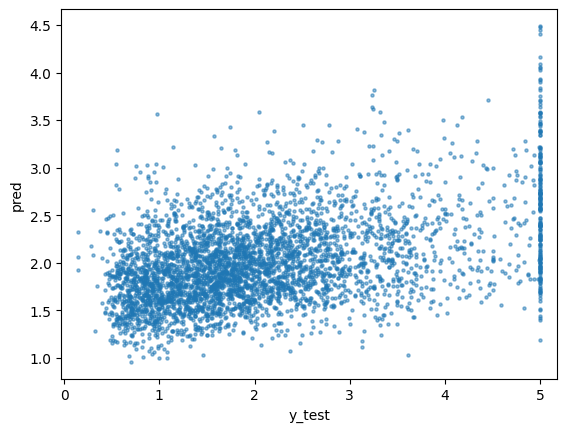

In [ ]:
model = KNeighborsRegressor(n_neighbors=10, weights='distance')
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(f'mean_squared_error: {mean_squared_error(y_test,pred):8.6f}')
plt.scatter(y_test,pred,s=5,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("pred")
plt.axis('equal')
plt.show()

Would using uniform weights yield better results?

In [ ]:
for k in range(1,20):
  model = KNeighborsRegressor(n_neighbors=k)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  print(f'{k = :2}, mean_squared_error: {mean_squared_error(y_test,pred):8.6f}')

k =  1, mean_squared_error: 1.575291
k =  2, mean_squared_error: 1.299088
k =  3, mean_squared_error: 1.191509
k =  4, mean_squared_error: 1.155374
k =  5, mean_squared_error: 1.142019
k =  6, mean_squared_error: 1.127698
k =  7, mean_squared_error: 1.122718
k =  8, mean_squared_error: 1.117769
k =  9, mean_squared_error: 1.116705
k = 10, mean_squared_error: 1.116952
k = 11, mean_squared_error: 1.117942
k = 12, mean_squared_error: 1.125403
k = 13, mean_squared_error: 1.131803
k = 14, mean_squared_error: 1.136268
k = 15, mean_squared_error: 1.135816
k = 16, mean_squared_error: 1.139333
k = 17, mean_squared_error: 1.144984
k = 18, mean_squared_error: 1.148571
k = 19, mean_squared_error: 1.154627


In [ ]:
print(np.mean(X_train,axis=0))
print(np.std(X_train,axis=0))

[ 3.86431002e+00  2.86111313e+01  5.40409167e+00  1.09271995e+00
  1.42974727e+03  3.06495317e+00  3.56250388e+01 -1.19563364e+02]
[1.89106975e+00 1.26270963e+01 2.19709476e+00 4.30028072e-01
 1.12575691e+03 1.06329549e+01 2.13207606e+00 2.00363871e+00]


In [ ]:
mean_tr = np.mean(X_train,axis=0)
std_tr = np.std(X_train,axis=0)
X_train = (X_train - mean_tr)/ std_tr
X_test = (X_test - mean_tr)/ std_tr

In [ ]:
for k in range(1,20):
  model = KNeighborsRegressor(n_neighbors=k, weights='distance')
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  print(f'{k = :2}, mean_squared_error: {mean_squared_error(y_test,pred):8.6f}')

k =  1, mean_squared_error: 0.646689
k =  2, mean_squared_error: 0.506234
k =  3, mean_squared_error: 0.463306
k =  4, mean_squared_error: 0.446676
k =  5, mean_squared_error: 0.433897
k =  6, mean_squared_error: 0.429674
k =  7, mean_squared_error: 0.427569
k =  8, mean_squared_error: 0.420690
k =  9, mean_squared_error: 0.420470
k = 10, mean_squared_error: 0.419446
k = 11, mean_squared_error: 0.415524
k = 12, mean_squared_error: 0.414660
k = 13, mean_squared_error: 0.415798
k = 14, mean_squared_error: 0.415604
k = 15, mean_squared_error: 0.415278
k = 16, mean_squared_error: 0.415995
k = 17, mean_squared_error: 0.415877
k = 18, mean_squared_error: 0.416034
k = 19, mean_squared_error: 0.416809


mean_squared_error: 0.415278


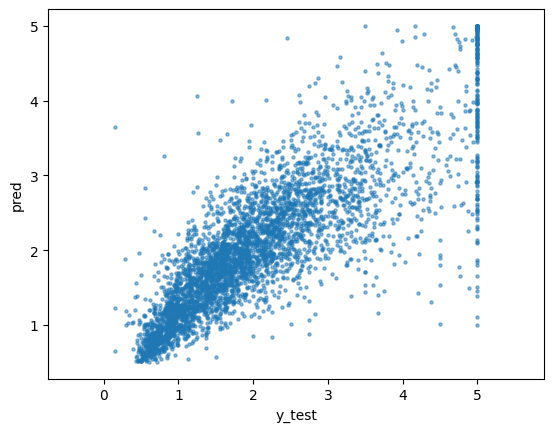

In [ ]:
model = KNeighborsRegressor(n_neighbors=15, weights='distance')
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(f'mean_squared_error: {mean_squared_error(y_test,pred):8.6f}')
plt.scatter(y_test,pred,s=5,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("pred")
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

dataset =fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.20, random_state=5361)

scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
def print_dataset_info(x):
  print("Means:", *(f"{x:.4f}" for x in x.mean(axis=0)))
  print("Standard deviations:", *(f"{x:.4f}" for x in x.std(axis=0)))
  print("Minima:", *(f"{x:.4f}" for x in x.min(axis=0)))
  print("Maxima:", *(f"{x:.4f}" for x in x.max(axis=0)))

In [ ]:
print_dataset_info(X_train_minmax)

Means: 0.2320 0.5414 0.0346 0.0213 0.0400 0.0019 0.3278 0.4855
Standard deviations: 0.1304 0.2476 0.0167 0.0128 0.0316 0.0086 0.2266 0.2032
Minima: 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
Maxima: 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000


In [ ]:
print_dataset_info(X_train_std)

Means: -0.0000 -0.0000 -0.0000 -0.0000 0.0000 0.0000 0.0000 -0.0000
Standard deviations: 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000
Minima: -1.7791 -2.1867 -2.0745 -1.6690 -1.2674 -0.2231 -1.4470 -2.3890
Maxima: 5.8886 1.8523 57.8624 76.6786 30.4260 116.6438 2.9666 2.5321


In [ ]:
print_dataset_info(X_test_minmax)

Means: 0.2342 0.5442 0.0356 0.0219 0.0394 0.0019 0.3315 0.4822
Standard deviations: 0.1334 0.2434 0.0255 0.0184 0.0325 0.0075 0.2286 0.2031
Minima: 0.0000 0.0000 0.0003 -0.0012 0.0001 0.0003 0.0021 0.0051
Maxima: 1.0000 1.0000 1.0712 0.7498 0.8006 0.4821 0.9968 1.0183


In [ ]:
print_dataset_info(X_test_std)

Means: 0.0168 0.0112 0.0567 0.0460 -0.0190 0.0027 0.0160 -0.0158
Standard deviations: 1.0227 0.9833 1.5290 1.4389 1.0292 0.8776 1.0088 0.9995
Minima: -1.7791 -2.1867 -2.0551 -1.7659 -1.2629 -0.1885 -1.4376 -2.3640
Maxima: 5.8886 1.8523 62.1298 57.0745 24.1049 56.1132 2.9525 2.6219


In [ ]:
print('Using MinMaxScaler')
for k in range(1,20):
  model = KNeighborsRegressor(n_neighbors=k, weights='distance')
  model.fit(X_train_minmax, y_train)
  pred = model.predict(X_test_minmax)
  print(f'{k = :2}, mean_squared_error: {mean_squared_error(y_test,pred):8.6f}')

print('\nUsing StandardScaler')
for k in range(1,20):
  model = KNeighborsRegressor(n_neighbors=k, weights='distance')
  model.fit(X_train_std, y_train)
  pred = model.predict(X_test_std)
  print(f'{k = :2}, mean_squared_error: {mean_squared_error(y_test,pred):8.6f}')


Using MinMaxScaler
k =  1, mean_squared_error: 0.593623
k =  2, mean_squared_error: 0.458620
k =  3, mean_squared_error: 0.420396
k =  4, mean_squared_error: 0.404784
k =  5, mean_squared_error: 0.391659
k =  6, mean_squared_error: 0.387768
k =  7, mean_squared_error: 0.382999
k =  8, mean_squared_error: 0.382909
k =  9, mean_squared_error: 0.381501
k = 10, mean_squared_error: 0.380904
k = 11, mean_squared_error: 0.381012
k = 12, mean_squared_error: 0.380764
k = 13, mean_squared_error: 0.382597
k = 14, mean_squared_error: 0.382740
k = 15, mean_squared_error: 0.383665
k = 16, mean_squared_error: 0.384643
k = 17, mean_squared_error: 0.386146
k = 18, mean_squared_error: 0.387076
k = 19, mean_squared_error: 0.387976

Using StandardScaler
k =  1, mean_squared_error: 0.646689
k =  2, mean_squared_error: 0.506234
k =  3, mean_squared_error: 0.463306
k =  4, mean_squared_error: 0.446676
k =  5, mean_squared_error: 0.433897
k =  6, mean_squared_error: 0.429674
k =  7, mean_squared_error: 0.4275

mean_squared_error: 0.380764


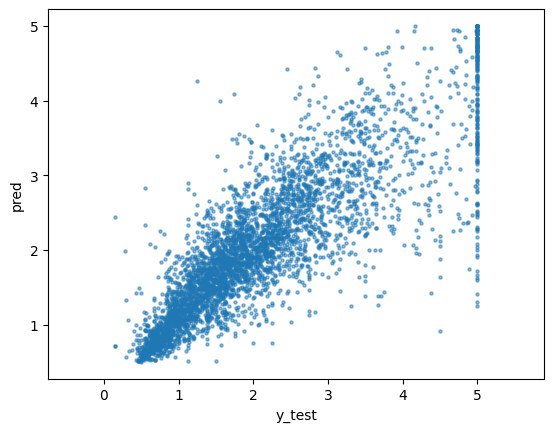

In [ ]:
model = KNeighborsRegressor(n_neighbors=12, weights='distance')
model.fit(X_train_minmax, y_train)
pred = model.predict(X_test_minmax)
print(f'mean_squared_error: {mean_squared_error(y_test,pred):8.6f}')
plt.scatter(y_test,pred,s=5,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("pred")
plt.axis('equal')
plt.show()

## **Implementing k-nearest neighbors**

In [ ]:
dataset = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.20, random_state=5361)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We will implement three different ways of computing the distance from test to training exmples. Notice than in all three cases, our implementation is much slower than the Sklearn implementation, which was programmed in C.

In [ ]:
class knn_regressor:

    def __init__(self,k=5):
      self.k = k
      return

    def fit(self,X_train,y_train):   # Currently self.mean_0 and self.mean_1 are the means of all the data - modify this to implement the requested algorithm
      self.X_train = X_train.copy()
      self.y_train = y_train.copy()

    def predict(self,X_test):
      dist = np.zeros((self.X_train.shape[0], X_test.shape[0]))
      # Looping over test examples
      for i in range(X_test.shape[0]):
        dist[:,i] = np.sum((self.X_train - X_test[i])**2,axis=1)
      nn = np.argpartition(dist,self.k,axis=0)[:self.k]
      dist = np.sqrt(dist[nn,np.tile(np.arange(nn.shape[1]),(nn.shape[0],1))])
      w = 1/(dist+0.00001)
      w = w/np.sum(w,axis=0)
      pred = np.sum(self.y_train[nn]*w,axis=0)
      return pred

    def predict2(self,X_test):
      # Idea: build a distance matrix dist of shape (X_train.shape[0], X_test.shape[0])
      # Where dist[i,j] is the distance from X_train[i] to X_test[j]
      dist = 0
      # Looping over attributes
      for i in range(X_test.shape[1]):
        dist += (self.X_train[:,i:i+1] - X_test[:,i:i+1].T)**2
      nn = np.argpartition(dist,self.k,axis=0)[:self.k]
      dist = np.sqrt(dist[nn,np.tile(np.arange(nn.shape[1]),(nn.shape[0],1))])
      w = 1/(dist+0.00001)
      w = w/np.sum(w,axis=0)
      pred = np.sum(self.y_train[nn]*w,axis=0)
      return pred

    def predict3(self,X_test):
      # Idea: build a distance matrix dist of shape (X_train.shape[0], X_test.shape[0])
      # Where dist[i,j] is the distance from X_train[i] to X_test[j]
      # No loops; we will use the fact that (X_train[i] - X_test[j])**2 = X_train[i]**2 + X_test[j]**2 - 2*X_train[i]*X_test[j]
      dist = np.sum(self.X_train**2,axis=1).reshape(-1,1) + np.sum(X_test**2,axis=1).reshape(1,-1) -2*np.matmul(self.X_train,X_test.T)
      nn = np.argpartition(dist,self.k,axis=0)[:self.k]
      dist = np.sqrt(dist[nn,np.tile(np.arange(nn.shape[1]),(nn.shape[0],1))])
      w = 1/(dist+0.00001)
      w = w/np.sum(w,axis=0)
      pred = np.sum(self.y_train[nn]*w,axis=0)
      return pred

    def predict4(self,X_test):
      # No loops, using broadcasting
      # It creates a very large intermediate array (X_train.shape[0],X_test.shape[0],X_train.shape[1]); it won't work for large datasets
      dist = np.sum((np.expand_dims(self.X_train,1) - X_test)**2,axis=-1)
      nn = np.argpartition(dist,self.k,axis=0)[:self.k]
      dist = np.sqrt(dist[nn,np.tile(np.arange(nn.shape[1]),(nn.shape[0],1))])
      w = 1/(dist+0.00001)
      w = w/np.sum(w,axis=0)
      pred = np.sum(self.y_train[nn]*w,axis=0)
      return pred

In [ ]:
model = knn_regressor(k=10)
model.fit(X_train,y_train)

start = time.time()
pred = model.predict(X_test)
elapsed_time = time.time()-start
print('\nElapsed_time testing  {0:.6f} '.format(elapsed_time))
print(f'mean_absolute_error: {mean_absolute_error(y_test,pred):6.4f}')
print(f'mean_squared_error: {mean_squared_error(y_test,pred):6.4f}')

start = time.time()
pred = model.predict2(X_test)
elapsed_time = time.time()-start
print('\nElapsed_time testing  {0:.6f} '.format(elapsed_time))
print(f'mean_absolute_error: {mean_absolute_error(y_test,pred):6.4f}')
print(f'mean_squared_error: {mean_squared_error(y_test,pred):6.4f}')

start = time.time()
pred = model.predict3(X_test)
elapsed_time = time.time()-start
print('\nElapsed_time testing  {0:.6f} '.format(elapsed_time))
print(f'mean_absolute_error: {mean_absolute_error(y_test,pred):6.4f}')
print(f'mean_squared_error: {mean_squared_error(y_test,pred):6.4f}')

pred = model.predict4(X_test)
elapsed_time = time.time()-start
print('\nElapsed_time testing  {0:.6f} '.format(elapsed_time))
print(f'mean_absolute_error: {mean_absolute_error(y_test,pred):6.4f}')
print(f'mean_squared_error: {mean_squared_error(y_test,pred):6.4f}')


Elapsed_time testing  7.689355 
mean_absolute_error: 0.4123
mean_squared_error: 0.3809

Elapsed_time testing  5.786540 
mean_absolute_error: 0.4123
mean_squared_error: 0.3809

Elapsed_time testing  2.628110 
mean_absolute_error: 0.4123
mean_squared_error: 0.3809

Elapsed_time testing  10.389216 
mean_absolute_error: 0.4123
mean_squared_error: 0.3809


## **Finding the optimal number of neighbors efficiently**

First lets find the running times of the brute-force methods that evaluate each value of k independently. The problem with this approach is that the distance from each training example to each test example is re-computed for evey value of k, which is wasteful.

In [ ]:
start = time.time()
nn = np.arange(1,51)
err = []
for k in nn:
  model = KNeighborsRegressor(n_neighbors=k, weights='distance')
  model.fit(X_train_minmax, y_train)
  pred = model.predict(X_test_minmax)
  mse = mean_squared_error(y_test,pred)
  #print(f'{k = :2}, {mse = :8.6f}')
  err.append(mse)

a = np.argmin(err)
elapsed_time = time.time()-start
print('\nElapsed_time testing  {0:.6f} '.format(elapsed_time))
print(f'Best value of k is {nn[a]}, with mse = {err[a]:8.6f}')


Elapsed_time testing  20.968378 
Best value of k is 12, with mse = 0.380764


In [ ]:
start = time.time()
nn = np.arange(1,51)
err = []
for k in nn:
  model = KNeighborsRegressor(n_neighbors=k)
  model.fit(X_train_minmax, y_train)
  pred = model.predict(X_test_minmax)
  mse = mean_squared_error(y_test,pred)
  #print(f'{k = :2}, {mse = :8.6f}')
  err.append(mse)

a = np.argmin(err)
elapsed_time = time.time()-start
print('\nElapsed_time testing  {0:.6f} '.format(elapsed_time))
print(f'Best value of k is {nn[a]}, with mse = {err[a]:8.6f}')


Elapsed_time testing  13.001629 
Best value of k is 10, with mse = 0.390547


The method model.neighbors(X,max_nn) returns a (X.shape[0],max_nn) array containing the max_nn nearest neighbors of each instance (row) in X, as well as their distance, both sorted by increasing distance. This allows to evaluate different values numbers of neighbors without repeatedly computing the distance.

In [ ]:
start = time.time()
model = KNeighborsRegressor(weights='distance')
model.fit(X_train_minmax, y_train)
dist, ind = model.kneighbors(X_test,n_neighbors=50)
weight = dist**-1 # The weights are given by the inverse distance
pred = np.cumsum(y_train[ind]*weight,axis=1)/np.cumsum(weight,axis=1)
err = np.mean((pred - y_test.reshape(-1,1))**2,axis=0)
a = np.argmin(err)
elapsed_time = time.time()-start
print('Elapsed_time testing  {0:.6f} '.format(elapsed_time))
print(f'Best value of k is {a+1}, with mse = {err[a]:8.6f}')

Elapsed_time testing  0.284403 
Best value of k is 12, with mse = 0.380764


How could you adapt the code to the uniform weight (or unweighted) case?

In [ ]:
start = time.time()
model = KNeighborsRegressor(weights='distance')
model.fit(X_train_minmax, y_train)
dist, ind = model.kneighbors(X_test,n_neighbors=50)
pred = np.cumsum(y_train[ind],axis=1)/np.arange(1,ind.shape[1]+1)
err = np.mean((pred - y_test.reshape(-1,1))**2,axis=0)
a = np.argmin(err)
elapsed_time = time.time()-start
print('Elapsed_time testing  {0:.6f} '.format(elapsed_time))
print(f'Best value of k is {a+1}, with mse = {err[a]:8.6f}')

Elapsed_time testing  0.283920 
Best value of k is 10, with mse = 0.390547


How could you adapt the code to classification tasks, both weighted and unweighted? This may require using loops.